In [1]:
import matplotlib.pyplot as plt
import numpy as np
import open3d 
import os

In [2]:
ot = np.genfromtxt('D:/cherepashkin1/598test/plot_output/e057/028/o_train_008', delimiter = ',')

OSError: D:/cherepashkin1/598test/plot_output/e057/028/o_train_008 not found.

In [19]:
gt = np.genfromtxt('D:/cherepashkin1/598test/plot_output/e057/028/gt_train', delimiter = ',')

In [5]:
ot0 = ot[0]

In [20]:
gt0 = gt[0]

In [6]:
ot0.shape

(1500,)

In [13]:
fig = plt.figure(figsize=(15,6))
el = np.repeat(35,3)
az = np.arange(25,115,30)
vox2mm = 0.05
def showpoints(ax, el, az, p0, p1 = None):
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
    if p1 is not None:
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=el, azim=az)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    plt.show()

<Figure size 1080x432 with 0 Axes>

In [14]:
showpoints(fig.add_subplot(1, el.shape[0], 0+1,
                                projection='3d'), el[0], az[0], np.reshape(ot0,(3,500)))

In [79]:
p*=0.05

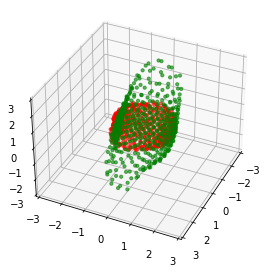

In [82]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, el.shape[0], 0+1, projection='3d')
p0 = np.reshape(ot0,(3,500))
p1 = np.reshape(gt0,(3,500))
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
#ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="b", alpha=0.6)
ax.view_init(elev=35, azim=25)
ax_lim = 60*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
plt.show()

In [81]:
np.sum(p1-p)

3.1768945940819273e-06

In [25]:
np.mean(np.abs(p0-p1))

0.5800368256404119

In [28]:
np.std(np.abs(p0-p1))

0.5737281352185307

In [57]:
prmat = np.genfromtxt('D:/circles/finetune_test/csv/prmat.csv', delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))

In [33]:
from numpy import linalg as LA

In [85]:
np.sqrt(p1[0,0]**2+p1[1,0]**2+p1[2,0]**2)

1.364406347274783

In [84]:
p1.shape

(3, 500)

In [50]:
F = LA.norm(p1,axis=0)

In [51]:
F.shape

(500,)

In [83]:
F[0]

1.364406347274783

In [86]:
x = p1/F

In [87]:
x.shape

(3, 500)

In [89]:
x[:,0]

array([-4.37113869e-08,  1.00000000e+00, -4.37113817e-08])

In [119]:
d = np.zeros([2,500])
d[0,:] = np.arctan2(x[1,:],x[0,:])
d[1,:] = np.arccos(x[2,:])

In [112]:
np.arctan(5/2)

1.1902899496825317

In [113]:
d.shape

(2, 500)

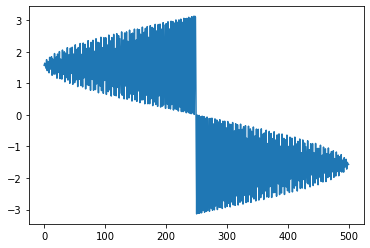

In [115]:
plt.plot(dirs[0,:])

In [104]:
dirs = dirs.transpose()

In [116]:
np.sum(np.abs(dirs[1,:]-d[1,:]))

2.0113824930959034e-05

In [121]:
np.sum(np.abs(dirs[0,:]-d[0,:]))

2.0751780792556754e-05

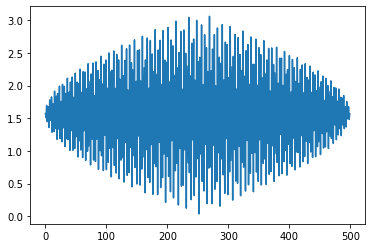

In [103]:
plt.plot(dirs[:,1])

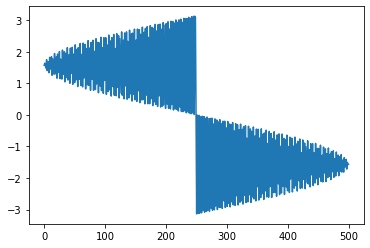

In [120]:
plt.plot(d[0,:])

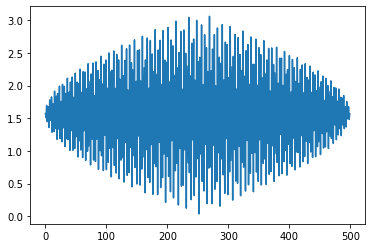

In [100]:
plt.plot(d[1,:])

In [ ]:
p = np.zeros([3,500])
p[0,:]=far*np.cos(dirs[:,0])*np.sin(dirs[:,1])
p[1,:]=far*np.sin(dirs[:,0])*np.sin(dirs[:,1])
p[2,:]=far*np.cos(dirs[:,1])

In [45]:
Y_N = np.genfromtxt('D:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [52]:
Y_N2 = Y_N[:500,:]

In [69]:
bX = np.genfromtxt('D:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [70]:
dirs = bX[:2,:]

In [53]:
F_N = np.matmul(LA.pinv(Y_N2),F)

In [54]:
F_N.shape

(441,)

In [60]:
import h5py

In [62]:
F_Nw = np.array(h5py.File('D:/cherepashkin1/phenoseed_csv/598csv9_F_N.h5','r').get('dataset'))

In [63]:
F_Nw.shape

(5270, 441)

In [64]:
with open('D:/cherepashkin1/phenoseed_csv/598csv9_F_N_file_names.txt','r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]

In [ ]:
F_N_names

In [66]:
indices = []
# for path in pathl:
[i for i, s in enumerate(F_N_names) if '1484744_1496471' in s][0]

3353

In [ ]:
1484744_1496471

In [67]:
F_Ngt = F_Nw[3353,:]

In [ ]:
F_Ngt

In [71]:
def f2p(y_n, f_n, dirs, nsp, vox2mm):
    p = np.zeros([y_n.shape[0],3,nsp])
    for i in range(y_n.shape[0]):
        far = np.matmul(y_n[i], f_n[i])
        p[i,0,:]=far*np.cos(dirs[i,:,0])*np.sin(dirs[i,:,1])
        p[i,1,:]=far*np.sin(dirs[i,:,0])*np.sin(dirs[i,:,1])
        p[i,2,:]=far*np.cos(dirs[i,:,1])
    p *= vox2mm
    return p

In [75]:
dirs = dirs.transpose()

In [76]:
far = np.matmul(Y_N2, F_Ngt)
p = np.zeros([3,500])
p[0,:]=far*np.cos(dirs[:,0])*np.sin(dirs[:,1])
p[1,:]=far*np.sin(dirs[:,0])*np.sin(dirs[:,1])
p[2,:]=far*np.cos(dirs[:,1])

In [77]:
p.shape

(3, 500)

In [73]:
p2 = f2p(Y_N, F_Ngt, dirs, 500, 0.05)

NameError: name 'torch' is not defined

In [ ]:
F_N

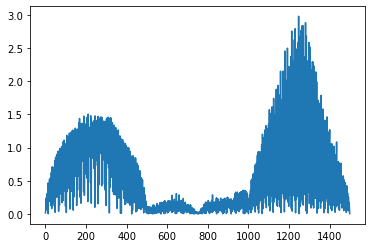

In [27]:
plt.plot(np.reshape(np.abs(p0-p1), (1500)))

In [124]:
import torch

In [127]:
v0 = torch.zeros(2,1500)

In [128]:
torch.max(v0)

tensor(0.)

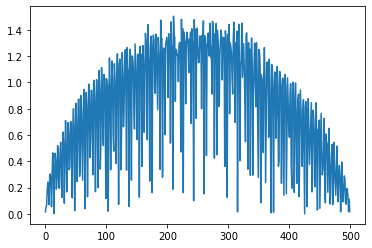

In [29]:
plt.plot(np.abs(p0-p1)[0])

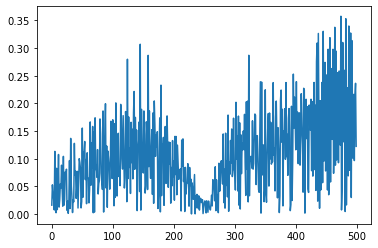

In [30]:
plt.plot(np.abs(p0-p1)[1])

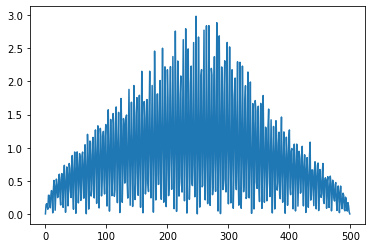

In [31]:
plt.plot(np.abs(p0-p1)[2])